In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from bitcoin import engine
df = engine.load_data('BTC-USD')
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
0,1520272320,11488.90,11498.86,11498.86,11488.9,1.483969,0.104927,1063075.0,0.034975,0.170432
1,1520272380,11493.10,11493.10,11493.10,11493.1,0.499374,0.104928,1063083.0,0.034975,0.170432
2,1520272440,11486.10,11493.01,11493.00,11486.1,3.876386,0.104928,1063089.0,0.034975,0.170432
3,1520272500,11486.10,11486.10,11486.10,11486.1,0.661000,0.104928,1063091.0,0.034975,0.170432
4,1520272560,11486.31,11490.50,11486.32,11487.4,0.787136,0.104928,1063095.0,0.038833,0.170432


In [2]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
count,1.810000e+02,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,1.810000e+02,181.000000,181.000000
mean,1.520278e+09,11585.185746,11586.898343,11586.161215,11585.912431,2.008395,0.092422,1.117687e+06,0.049194,0.162776
std,3.143889e+03,59.598835,59.650008,59.731913,59.548406,2.681406,0.005716,6.648388e+04,0.008945,0.012204
min,1.520272e+09,11481.940000,11481.960000,11481.960000,11481.960000,0.005760,0.082966,1.039913e+06,0.034975,0.140528
25%,1.520275e+09,11520.000000,11530.000000,11520.000000,11529.990000,0.597247,0.089855,1.049027e+06,0.038833,0.168922
50%,1.520278e+09,11618.010000,11618.040000,11618.010000,11618.010000,1.477900,0.092494,1.172929e+06,0.048710,0.169182
75%,1.520280e+09,11634.670000,11636.110000,11635.750000,11635.000000,2.465594,0.093278,1.182469e+06,0.058175,0.170432
max,1.520283e+09,11643.490000,11645.360000,11644.000000,11643.990000,27.523193,0.106180,1.193861e+06,0.095212,0.171182


In [3]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
time,1.000000,0.703031,0.704980,0.708974,0.699577,0.022825,-0.353378,0.511538,0.901774,-0.752070
low,0.703031,1.000000,0.995371,0.996394,0.998829,0.113870,-0.633921,-0.026626,0.721576,-0.323534
high,0.704980,0.995371,1.000000,0.998786,0.996403,0.150211,-0.631351,-0.028543,0.723165,-0.327063
open,0.708974,0.996394,0.998786,1.000000,0.995054,0.124214,-0.630155,-0.023844,0.726568,-0.331768
close,0.699577,0.998829,0.996403,0.995054,1.000000,0.139862,-0.635327,-0.030715,0.718360,-0.319223
volume,0.022825,0.113870,0.150211,0.124214,0.139862,1.000000,-0.112309,-0.131477,0.008683,0.028727
tw_sentiment,-0.353378,-0.633921,-0.631351,-0.630155,-0.635327,-0.112309,1.000000,0.192983,-0.256601,-0.034202
tw_followers,0.511538,-0.026626,-0.028543,-0.023844,-0.030715,-0.131477,0.192983,1.000000,0.470845,-0.526267
reddit_sentiment,0.901774,0.721576,0.723165,0.726568,0.718360,0.008683,-0.256601,0.470845,1.000000,-0.678365
google_sentiment,-0.752070,-0.323534,-0.327063,-0.331768,-0.319223,0.028727,-0.034202,-0.526267,-0.678365,1.000000


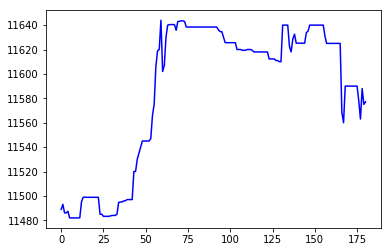

In [4]:
plt.plot(df['close'], 'b')

In [5]:
X_train, X_test, y_train, y_test, scaler_x, scaler_y = engine.prepare(df)

In [6]:
model, history = engine.train(X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            164800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 806,601
Trainable params: 806,601
Non-trainable params: 0
_________________________________________________________________


([<matplotlib.lines.Line2D at 0x11f00e550>], 'g')

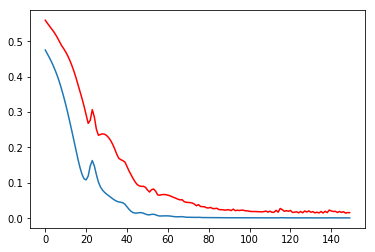

In [7]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error']), 'g'

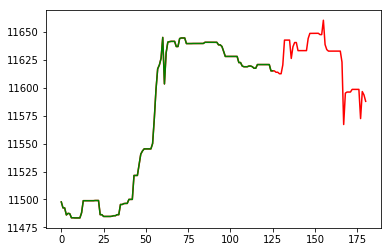

In [8]:
import numpy as np

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

y_predict_train = model.predict(X_train)
y_predict_train = scaler_y.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scaler_y.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')

In [9]:
engine.test_order_percent(df, model, scaler_x, scaler_y)

Error Order percentage: 6.08%
